# Vizualizing BigQuery data in a Jupyter notebook

[BigQuery](https://cloud.google.com/bigquery/docs/) is a petabyte-scale analytics data warehouse that you can use to run SQL queries over vast amounts of data in near realtime.

Data visualization tools can help you make sense of your BigQuery data and help you analyze the data interactively. You can use visualization tools to help you identify trends, respond to them, and make predictions using your data. In this tutorial, you use the BigQuery Python client library and pandas in a Jupyter notebook to visualize data in the BigQuery natality sample table.

## Using Jupyter magics to query BigQuery data

The BigQuery Python client library provides a magic command that allows you to run queries with minimal code.

The BigQuery client library provides a cell magic, `%%bigquery`. The `%%bigquery` magic runs a SQL query and returns the results as a pandas `DataFrame`. The following cell executes a query of the BigQuery natality public dataset and returns the total births by year.

In [216]:

%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


# Install necessary libraries 

In [ ]:
!pip install google-cloud-bigquery
!pip install google-cloud-bigquery-storage

In [ ]:
!pip install --user --upgrade google-api-python-client
!pip install --upgrade google-cloud-storage

In [214]:
load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


# Import neccessary libararies

In [213]:
import pandas as pd

In [215]:

import google.auth
from google.cloud import bigquery
#from google.cloud import google_cloud_bigquery_storage
from google.cloud import bigquery
from google.cloud import storage

client = bigquery.Client()

## Using Python to query BigQuery data

Behind the scenes, `%%bigquery` uses the BigQuery Python client library to run the given query, convert the results to a pandas `Dataframe`, optionally save the results to a variable, and finally display the results. Using the BigQuery Python client library directly instead of through magic commands gives you more control over your queries and allows for more complex configurations. The library's integrations with pandas enable you to combine the power of declarative SQL with imperative code (Python) to perform interesting data analysis, visualization, and transformation tasks.

To use the BigQuery Python client library, start by importing the library and initializing a client. The BigQuery client is used to send and receive messages from the BigQuery API.

In [219]:
from google.cloud import bigquery
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [220]:
sql = """
SELECT
  Date,
  country_region AS Country,
  sum(Confirmed) as Confirmed,
  sum(Recovered) as Recovered,
  sum(Deaths) as Deaths
FROM
  bigquery-public-data.covid19_jhu_csse.summary
WHERE
  Date >= '2020-08-01'
GROUP BY 
  Date,
  country_region
ORDER BY
 Date
"""
df = client.query(sql).to_dataframe()
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-08-01,US,4620444,1461885,154447
1,2020-08-01,Chad,936,813,75
2,2020-08-01,Cuba,2633,2367,87
3,2020-08-01,Fiji,27,18,1
4,2020-08-01,Iran,306752,265830,16982


# Exploratory Data Analytics & Time Series Forecasting 


In [221]:
import matplotlib.pyplot as plt
import pandas as pd

#change the path to your file location - or to BIGQUERY

#covid_df = pd.read_csv('data/covid_19.csv')

covid_df=df

covid_df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-08-01,US,4620444,1461885,154447
1,2020-08-01,Chad,936,813,75
2,2020-08-01,Cuba,2633,2367,87
3,2020-08-01,Fiji,27,18,1
4,2020-08-01,Iran,306752,265830,16982


# Exploratory Data Analysis Top - 10 for August-2020

In [222]:
import datetime

date_time_obj = datetime.date(2020,8,1)
print(date_time_obj)

2020-08-01


In [223]:
#top 10 countries on August-01-2020

covid_df_10 = covid_df[covid_df['Date'] == date_time_obj]

covid_df_top10 = covid_df_10.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)[:10]

covid_df_top10=covid_df_top10.to_frame()
covid_df_top10['Confirmed']
#covid_df_top10['Country'] = covid_df_top10.index
covid_df_top10.reset_index(level=0, inplace=True)
covid_df_top10


,Country,Confirmed
0,US,4620444
1,Brazil,2707877
2,India,1750723
3,Russia,843890
4,South Africa,503290
5,Mexico,434193
6,Peru,407492
7,Chile,357658
8,Iran,306752
9,Colombia,306181


# Plot the Top-10 Countries

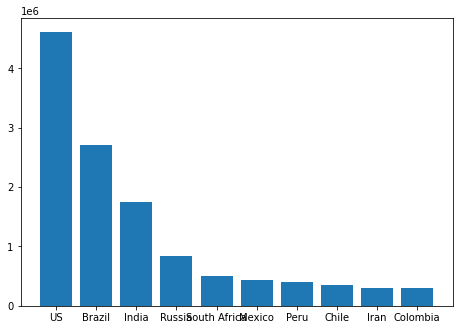

In [224]:
#Plot Top- 10 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Country = covid_df_top10['Country']
Confirmed = covid_df_top10['Confirmed']
ax.bar(Country,Confirmed)
plt.show()

# Perform DataFrame Operations to filter out data for US only and date after 08-01-2020

In [225]:

#filter data for USA

df_usa = covid_df[covid_df['Country'] == 'US']
df_usa = df_usa[df_usa['Date'] >= date_time_obj]

print(df_usa.head(10))
print(df_usa.tail(10))


            Date Country  Confirmed  Recovered  Deaths
0     2020-08-01      US    4620444    1461885  154447
188   2020-08-02      US    4667955    1468689  154860
376   2020-08-03      US    4713540    1513446  155402
564   2020-08-04      US    4771080    1528979  156801
752   2020-08-05      US    4823890    1577851  158250
940   2020-08-06      US    4883582    1598624  160104
1128  2020-08-07      US    4941755    1623870  161347
1316  2020-08-08      US    4997929    1643118  162423
1504  2020-08-09      US    5044864    1656864  162938
1692  2020-08-10      US    5094400    1670755  163463
            Date Country  Confirmed  Recovered  Deaths
7708  2020-09-11      US    6443743    2417878  192979
7896  2020-09-12      US    6485214    2434658  193693
8084  2020-09-13      US    6519573    2451406  194071
8272  2020-09-14      US    6553399    2474570  194489
8460  2020-09-15      US    6593269    2495127  195786
8648  2020-09-16      US    6630051    2525573  196763
8836  2020

In [226]:
#remove year from date 
#2020-08-01 TO 08/01
date_formatted= pd.to_datetime(df_usa['Date']).dt.strftime('%m/%d')


print(date_formatted)

0       08/01
188     08/02
376     08/03
564     08/04
752     08/05
940     08/06
1128    08/07
1316    08/08
1504    08/09
1692    08/10
1880    08/11
2068    08/12
2256    08/13
2444    08/14
2632    08/15
2820    08/16
3008    08/17
3196    08/18
3384    08/19
3572    08/20
3760    08/21
3948    08/22
4136    08/23
4324    08/24
4512    08/25
4700    08/26
4888    08/27
5076    08/28
5264    08/29
5452    08/30
5640    08/31
5828    09/01
6016    09/02
6204    09/03
6392    09/04
6580    09/05
6768    09/06
6956    09/07
7144    09/08
7332    09/09
7520    09/10
7708    09/11
7896    09/12
8084    09/13
8272    09/14
8460    09/15
8648    09/16
8836    09/17
9024    09/18
9212    09/19
9400    09/20
Name: Date, dtype: object


# Plot the Confirmed cases, and then plot the confirmed, deaths and recovered

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


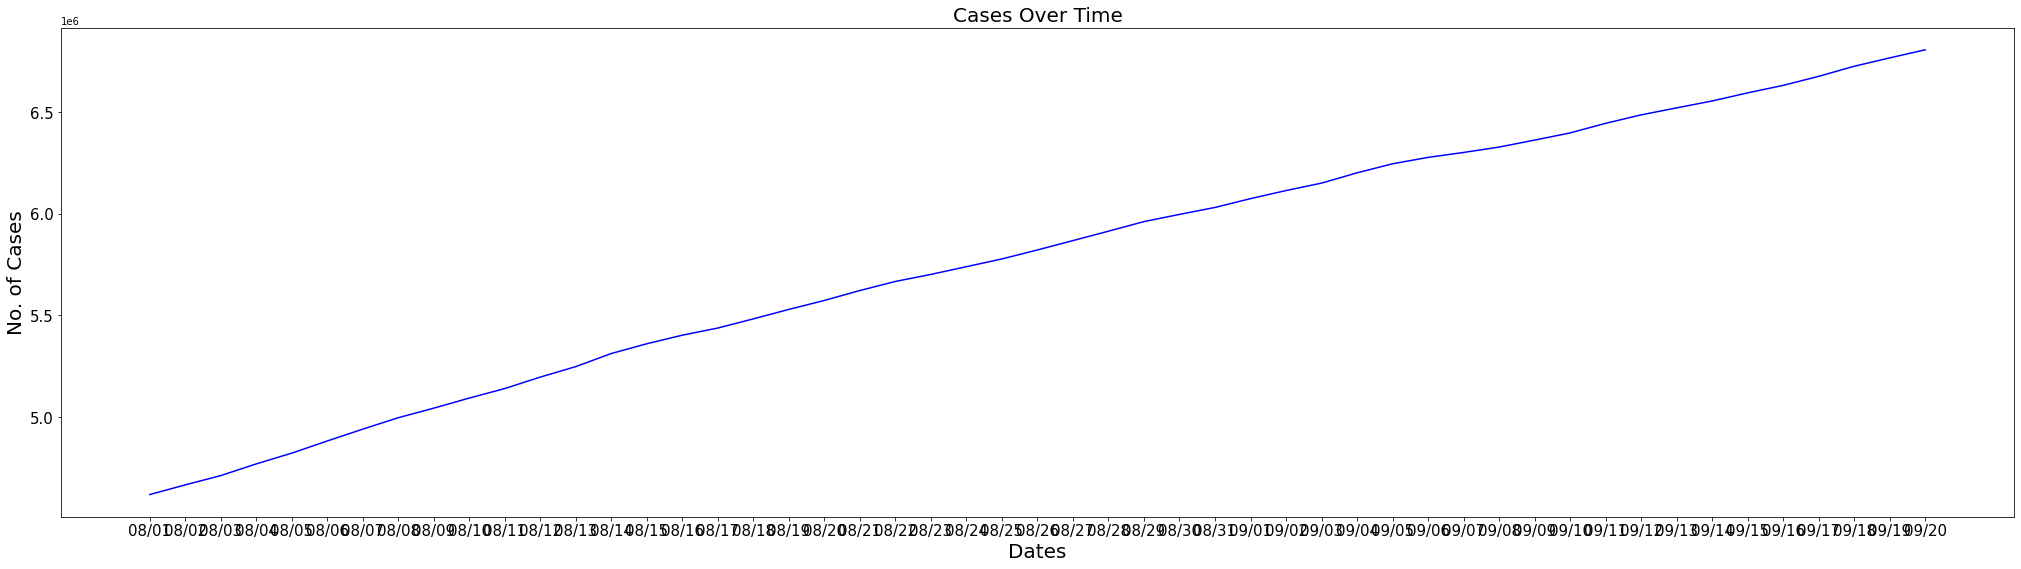

In [227]:
#PLOT CONFIRMED CASES
plt.figure(figsize=(35, 9))
plt.plot(date_formatted, df_usa['Confirmed'],color='b')


plt.title('Cases Over Time', size=20)
plt.xlabel('Dates', size=20)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

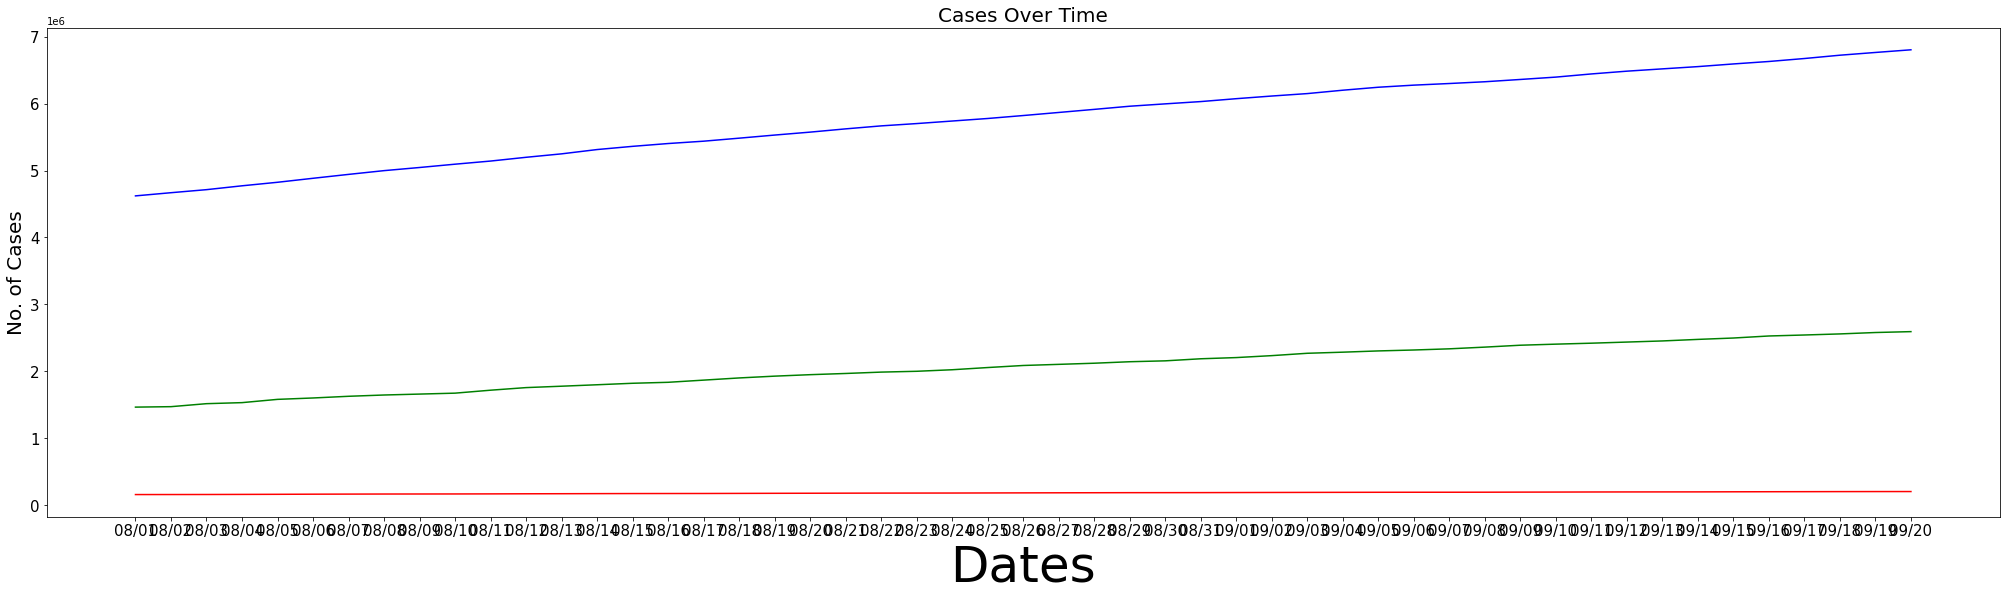

In [228]:
# Plot the confirmed, deaths and recovered cases

plt.figure(figsize=(35, 9))
plt.plot(date_formatted, df_usa['Confirmed'],color='b')
plt.plot(date_formatted, df_usa['Deaths'] ,color='r')
plt.plot(date_formatted, df_usa['Recovered'],color='g')

plt.title('Cases Over Time', size=20)
plt.xlabel('Dates', size=50)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Import Prophet for Timeseries forecasting
### Needs ds and y attributes for forecasting, therefore rename ds as date and Deaths as y


In [229]:
df_usa.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-08-01,US,4620444,1461885,154447
188,2020-08-02,US,4667955,1468689,154860
376,2020-08-03,US,4713540,1513446,155402
564,2020-08-04,US,4771080,1528979,156801
752,2020-08-05,US,4823890,1577851,158250


# Install the fbprophet library, then import the same

In [230]:
!pip install fbprophet

In [231]:
#import the required libraries

from fbprophet import Prophet

deaths = df_usa.iloc[:,[0,4]] #pd.to_datetime(deaths['ds'])

#Rename the column Date to ds, and Deaths to y
deaths = deaths.rename(columns={'Date':'ds','Deaths':'y'})
deaths.tail()


,ds,y
8648,2020-09-16,196763
8836,2020-09-17,197633
9024,2020-09-18,198570
9212,2020-09-19,199259
9400,2020-09-20,199509


# Train the fbprophet model based on US data only. 
In particular, we assume that the average frequency and magnitude of trend changes in the future will be the same as that which we observe in the history. We project these trend changes forward and by computing their distribution we obtain uncertainty intervals. 
While predicting a value of something using Prophet we get not only the estimated value but also the lower and upper bound of the uncertainty interval. To make them more useful for us, we should dig a little bit into the details and see how Prophet produces them.

In [232]:
m = Prophet(interval_width=0.95)
m.fit(deaths)

future = m.make_future_dataframe(periods=7)
future.tail(8)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
50,2020-09-20
51,2020-09-21
52,2020-09-22
53,2020-09-23
54,2020-09-24
55,2020-09-25
56,2020-09-26
57,2020-09-27


# Time series forecasted values 


In [233]:
forecast = m.predict(future)

forecast = forecast.round(0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
51,2020-09-21,200125.0,199911.0,200316.0
52,2020-09-22,201149.0,200886.0,201421.0
53,2020-09-23,202287.0,201857.0,202677.0
54,2020-09-24,203286.0,202640.0,203875.0
55,2020-09-25,204276.0,203433.0,205130.0
56,2020-09-26,205079.0,203987.0,206205.0
57,2020-09-27,205401.0,204009.0,206789.0


# Plotting the forecasted values 


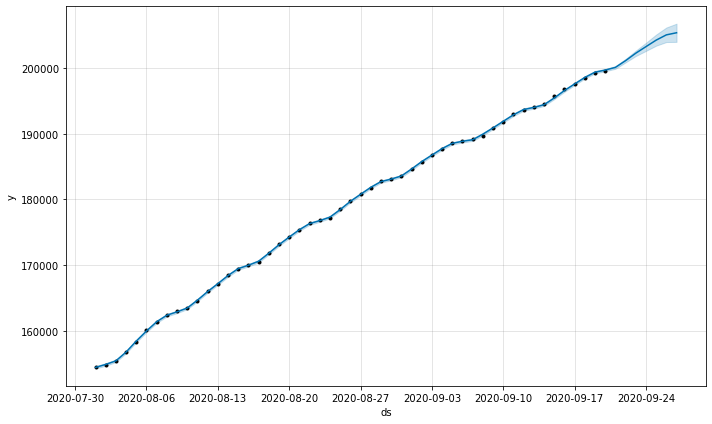

In [234]:
deaths_forecast_plot = m.plot(forecast)

# Save the model for future purposes

In [235]:
import pickle

In [236]:
# save the model to disk
filename = 'finalized_model.pb'
pickle.dump(m, open(filename, 'wb'))